In [58]:
from scipy.stats import truncnorm, multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def m_n(Sn, S0, m0, var, X, y):
    return Sn @ ( np.add(S0.I @ m0, 1/var * X.T * y) )

In [3]:
def s_n(S0, var, X):
    return ( np.add(S0.I, 1/var * X.T @ X) ).I

In [4]:
# Testing if functions m_n and s_n gives same values as in Q3  

mu_1 = 1
mu_2 = -1
var_1 = 1
var_2 = 4
var_t = 5
t = 3

m0 = np.array([[mu_1], 
               [mu_2]])

S0 = np.matrix( [[var_1, 0], 
                 [0, var_2]] )

X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)

mn = m_n(Sn, S0, m0, var_t, X, t)

print(Sn)
print(mn)


[[0.9 0.4]
 [0.4 2.4]]
[[ 1.1]
 [-1.4]]


# Q4

In [5]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [6]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 10#mu_1
s2_0 = -10#mu_2

In [7]:
#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(mu_1 - mu_2)/np.sqrt(var_t), b=np.inf, loc=(mu_1 - mu_2), scale=np.sqrt(var_t))

In [8]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[var_1, 0], [0, var_2]] )
X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)

for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, var_t, X, T[i])
    samples = multivariate_normal.rvs(np.ravel(mn), Sn)
    S1[i] = samples[0]
    S2[i] = samples[1]
    
    

(array([4.35553585e-01, 3.29531645e-01, 1.82059583e-01, 7.80858660e-02,
        2.40507846e-02, 5.42673541e-03, 9.07975186e-04, 1.26694212e-04,
        0.00000000e+00, 0.00000000e+00, 2.11157020e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11157020e-05]),
 array([2.92757551e-05, 9.47191724e-01, 1.89435417e+00, 2.84151662e+00,
        3.78867907e+00, 4.73584152e+00, 5.68300397e+00, 6.63016642e+00,
        7.57732886e+00, 8.52449131e+00, 9.47165376e+00, 1.04188162e+01,
        1.13659787e+01, 1.23131411e+01, 1.32603036e+01, 1.42074660e+01,
        1.51546285e+01, 1.61017909e+01, 1.70489533e+01, 1.79961158e+01,
        1.89432782e+01]),
 <a list of 20 Patch objects>)

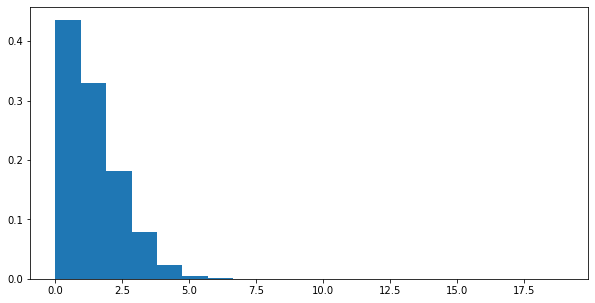

In [9]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(T, density=True, bins=20)

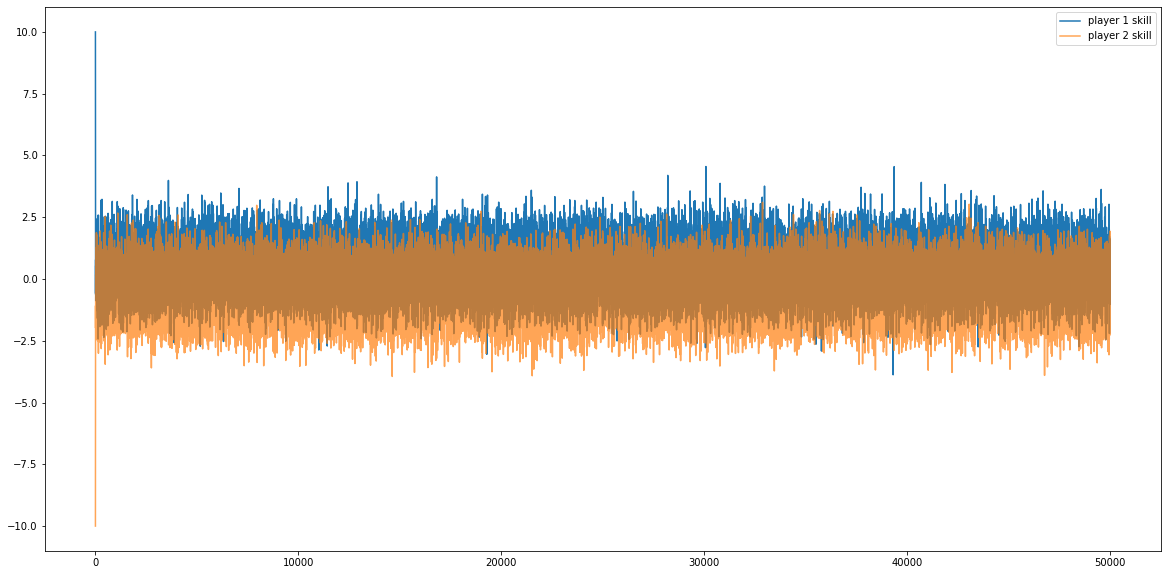

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

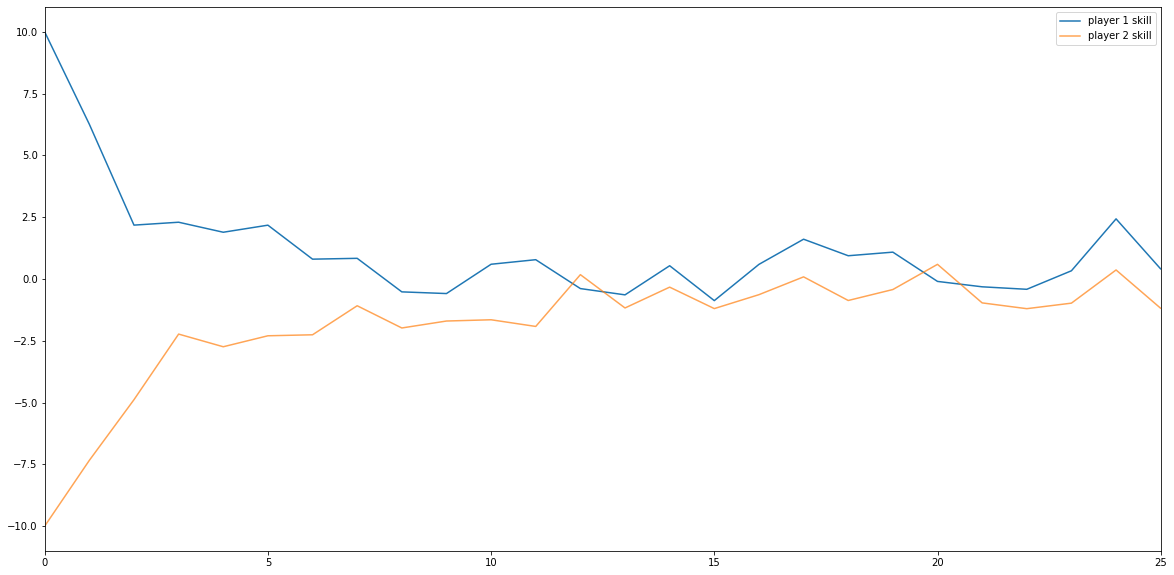

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 25)
plt.show()

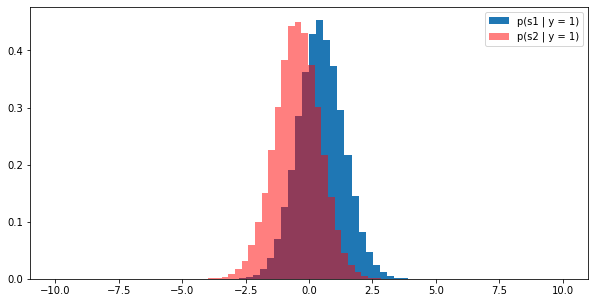

In [12]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [14]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.46515159465336675
est mean S2: -0.4643420833103256
est var S1: 0.7944864445708876
est var S2: 0.7847857432774553


The initial values
<br>
s1_0 = 10 
<br>
s2_0 = -10
<br>
<br>
Generates a burn in period of about 5-6 iterations. A better choice of initial values is to choose the mean of the sampled data points for each player.
<br>
s1_0 = 0.47
<br>
s2_0 = -0.47

## Rerun with new params

In [15]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [16]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(var_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(var_t))

In [17]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1],
               [mu_2]])

S0 = np.matrix( [[var_1, 0], 
                 [0, var_2]] )

X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)


for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, var_t, X, T[i])
    samples = multivariate_normal.rvs(np.ravel(mn), Sn)
    S1[i] = samples[0]
    S2[i] = samples[1]
    
    
    

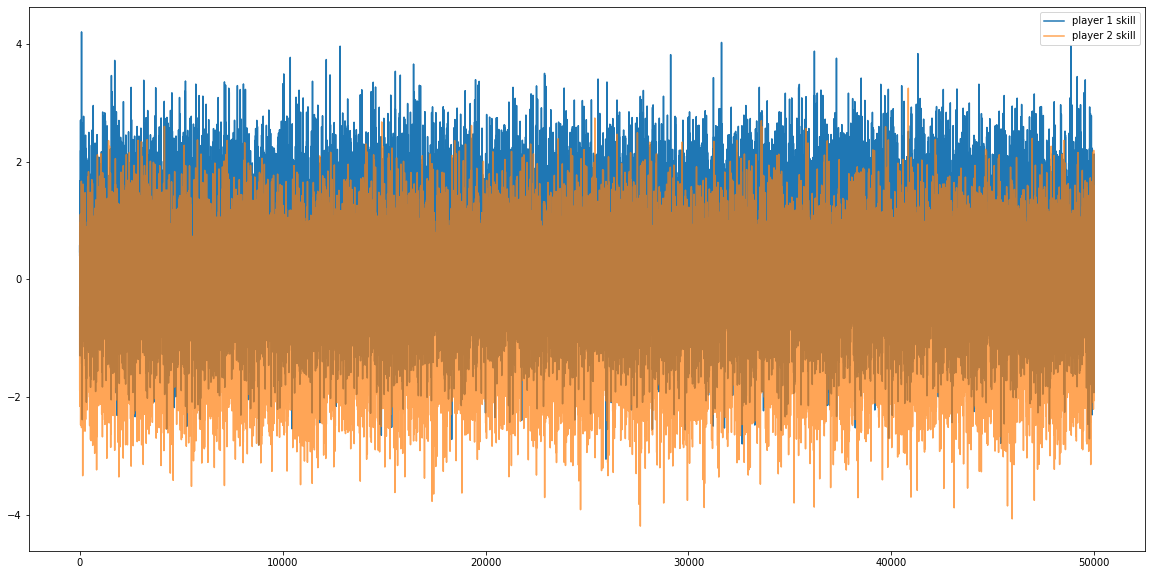

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

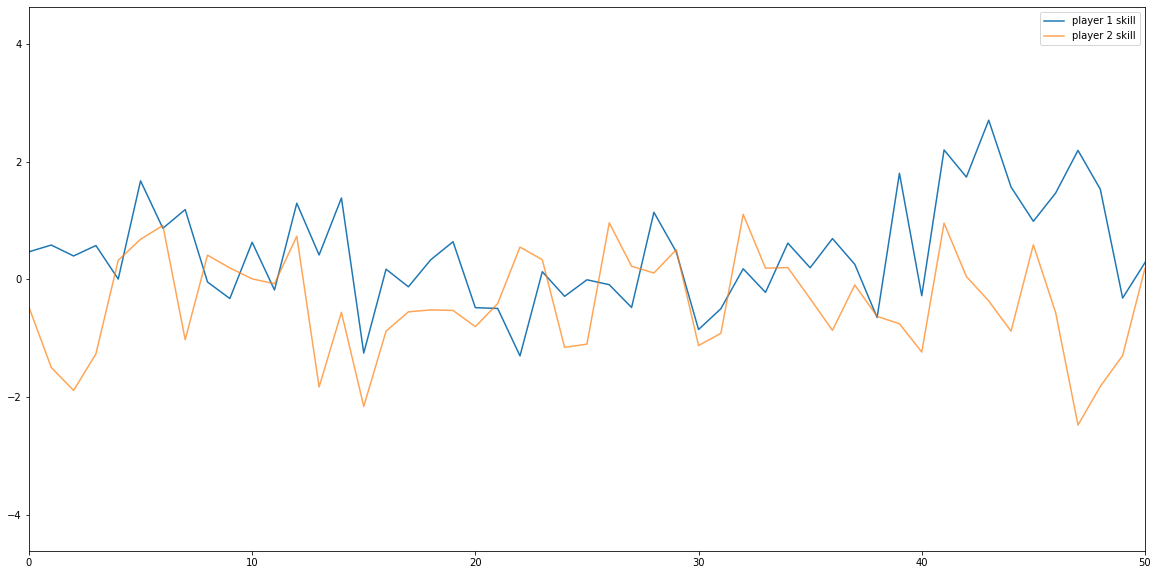

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 50)
plt.show()

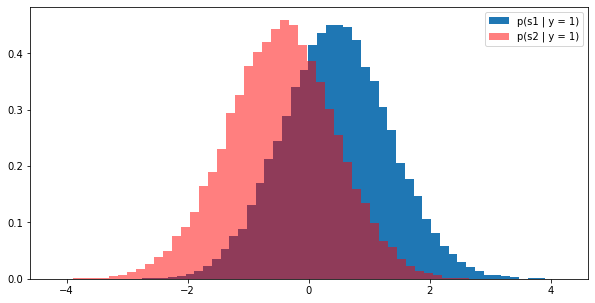

In [20]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [21]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.46122579395380514
est mean S2: -0.4609129524913385
est var S1: 0.7804373266208985
est var S2: 0.788906047880909


In [22]:
def gauss_approx(data1, data2):
    S0 = np.cov(data1, data2)
    m0 = [np.mean(data1), np.mean(data2)]
    return m0, S0

In [23]:
def normal_pdf(x, mean, var):
    return ( 1 / np.sqrt(2 * np.pi * var) ) * np.exp( ( -1 / ( 2 * var ) ) * ( (x - mean) **2 ) )

In [24]:
est_mean, est_cov = gauss_approx(S1, S2)
print(est_mean)
print(est_cov)

[0.46122579395380514, -0.4609129524913385]
[[0.78045294 0.20982084]
 [0.20982084 0.78892183]]


# Testing different sample sizes

In [25]:
import time

In [26]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [27]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(var_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(var_t))

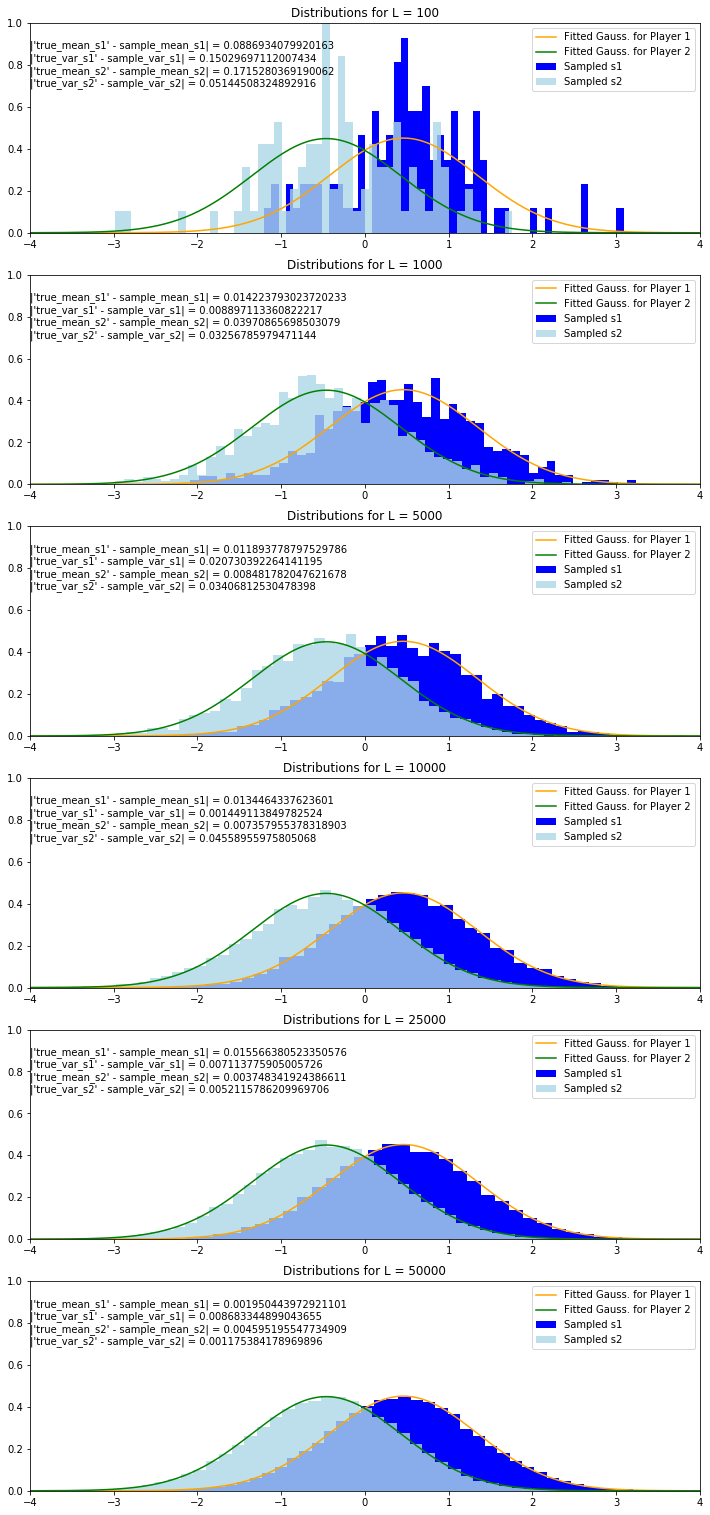

In [28]:
lengths = [100, 1000, 5000, 10000, 25000, 50000]
times = []

fig, axes = plt.subplots(len(lengths),1, figsize=(12,27))

for i, L in enumerate(lengths):
    start = time.time()
    T = np.zeros(L)
    S1 = np.zeros(L)
    S2 = np.zeros(L)

    T[0] = t0
    S1[0] = s1_0
    S2[0] = s2_0
    m0 = np.array([[mu_1], 
                   [mu_2]])
    
    S0 = np.matrix( [[var_1, 0],
                     [0, var_2]] )
    
    X = np.array([[1, -1]])

    Sn = s_n(S0, var_t, X)


    for j in range(1, L):
        # p(t_k+1 | s1_k, s2_k, y = 1)
        mu_t = S1[j - 1] - S2[j - 1]
        T[j] = truncnorm.rvs(a=(0 - mu_t)/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))

        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, var_t, X, T[j])
        samples = multivariate_normal.rvs(np.ravel(mn), Sn)
        S1[j] = samples[0]
        S2[j] = samples[1]
    
    times.append(time.time() - start)
    xv = np.linspace( -4 , 4 ,200)
    
    axes[i].plot(xv ,normal_pdf(xv, est_mean[0], est_cov[0, 0]), label="Fitted Gauss. for Player 1", color="orange")
    axes[i].hist(S1, density=True, bins=50, label="Sampled s1", color="blue")
    
    axes[i].plot(xv ,normal_pdf(xv, est_mean[1], est_cov[1, 1]), label="Fitted Gauss. for Player 2", color="green")
    axes[i].hist(S2, density=True, bins=50, label="Sampled s2", color="lightblue", alpha=0.8)
    
    axes[i].set_title(f'Distributions for L = {L}')
    axes[i].legend(loc="best")
    axes[i].set_xlim(-4, 4)
    axes[i].set_ylim(0, 1)
    axes[i].text(-4,0.7, f"|'true_mean_s1' - sample_mean_s1| = {np.abs(est_mean[0] - np.mean(S1))} \
                        \n|'true_var_s1' - sample_var_s1| = {np.abs(est_cov[0, 0] - np.var(S1))} \
                        \n|'true_mean_s2' - sample_mean_s2| = {np.abs(est_mean[1] - np.mean(S2))} \
                        \n|'true_var_s2' - sample_var_s2| = {np.abs(est_cov[1, 1] - np.var(S2))}")

In [276]:
times

[0.0687861442565918,
 0.5216057300567627,
 2.6788313388824463,
 6.66915488243103,
 13.646949291229248,
 27.681951761245728]

Text(0, 0.5, 'Time (s)')

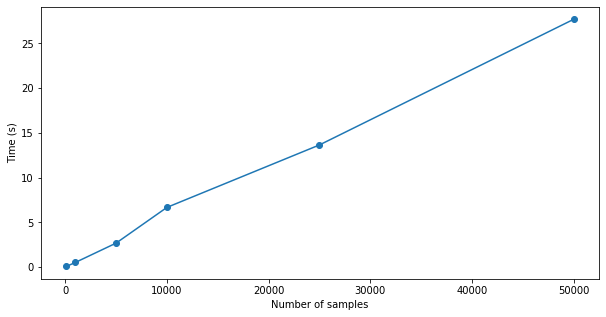

In [277]:
plt.plot(lengths, times, marker = 'o')
plt.xlabel("Number of samples")
plt.ylabel("Time (s)")

We can see that we don't get much in terms of approximating the mean & variance going further than 5000 data points. 1000 samples might even be enough.

p(s_1) = N(0, 1)
p(s_1 | y = 1) = N(0.47, 0.58)
<br>
p(s_2) = N(0, 1)
p(s_2 | y = 1) = N(-0.47, 0.58)
<br>
<br>
In the light of new data, i.e. that player 1 won, we are now more sure that player 1 has a positive skill level since the mean has increased and the variance has shrinked.
<br>
<br>
The same is true for player 2, but in reverse. Now that we know that player 2 lost, we are a little bit more sure that player 2 has a negative skill level

# Q5

In [29]:
import pandas as pd

In [260]:
def reset_teams_dict(df):
    teams_df = df[['team1', 'team2']].values.ravel()
    teams_df = pd.unique(teams_df)
    return {t : (25, (25/3)**2) for t in teams_df}

In [30]:
series_df = pd.read_csv('SerieA.csv')
series_df.count()

yyyy-mm-dd    380
HH:MM         380
team1         380
team2         380
score1        380
score2        380
dtype: int64

In [280]:
series_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2
0,2018-08-18,18:00,Chievo,Juventus,2,3
1,2018-08-18,20:30,Lazio,Napoli,1,2
2,2018-08-19,18:00,Torino,Roma,0,1
3,2018-08-19,20:30,Sassuolo,Inter,1,0
4,2018-08-19,20:30,Parma,Udinese,2,2


In [31]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
yyyy-mm-dd    380 non-null object
HH:MM         380 non-null object
team1         380 non-null object
team2         380 non-null object
score1        380 non-null int64
score2        380 non-null int64
dtypes: int64(2), object(4)
memory usage: 17.9+ KB


In [32]:
no_ties_df = series_df.loc[series_df['score1'] != series_df['score2']]
no_ties_df.count()

yyyy-mm-dd    272
HH:MM         272
team1         272
team2         272
score1        272
score2        272
dtype: int64

In [33]:
no_ties_df['result'] = no_ties_df.apply(lambda row: 1 if row.score1 > row.score2 else -1, axis=1)

C:\Users\maxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
no_ties_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
1,2018-08-18,20:30,Lazio,Napoli,1,2,-1
2,2018-08-19,18:00,Torino,Roma,0,1,-1
3,2018-08-19,20:30,Sassuolo,Inter,1,0,1
5,2018-08-19,20:30,Empoli,Cagliari,2,0,1


In [262]:
teams_dict = reset_teams_dict(no_ties_df)
teams_dict

{'Chievo': (25, 69.44444444444446),
 'Juventus': (25, 69.44444444444446),
 'Lazio': (25, 69.44444444444446),
 'Napoli': (25, 69.44444444444446),
 'Torino': (25, 69.44444444444446),
 'Roma': (25, 69.44444444444446),
 'Sassuolo': (25, 69.44444444444446),
 'Inter': (25, 69.44444444444446),
 'Empoli': (25, 69.44444444444446),
 'Cagliari': (25, 69.44444444444446),
 'Bologna': (25, 69.44444444444446),
 'Spal': (25, 69.44444444444446),
 'Atalanta': (25, 69.44444444444446),
 'Frosinone': (25, 69.44444444444446),
 'Milan': (25, 69.44444444444446),
 'Parma': (25, 69.44444444444446),
 'Udinese': (25, 69.44444444444446),
 'Sampdoria': (25, 69.44444444444446),
 'Genoa': (25, 69.44444444444446),
 'Fiorentina': (25, 69.44444444444446)}

In [222]:
def gibbs_sample_one_game(mu_1, var_1, mu_2, var_2, y, iterations):
    # TODO: handle burn in
    var_t = (25/6)**2
    std_t = np.sqrt(var_t)
    
    T = np.zeros(iterations)
    S1 = np.zeros(iterations)
    S2 = np.zeros(iterations)

    T[0] = 0 #TODO: what should we use here?
    S1[0] = mu_1
    S2[0] = mu_2
    m0 = np.array([[mu_1], 
                   [mu_2]])
    
    S0 = np.matrix( [[var_1, 0],
                     [0, var_2]] )
    
    X = np.array([[1, -1]])

    Sn = s_n(S0, var_t, X)

    for i in range(1, iterations):
        # p(t_k+1 | s1_k, s2_k, y)
        mu_t = S1[i - 1] - S2[i - 1]
        
        lower, upper = (0, np.inf) if y==1 else (-np.inf, 0)
            
        T[i] = truncnorm.rvs(a=(lower - mu_t)/std_t, 
                             b=(upper - mu_t)/std_t, 
                             loc=mu_t, 
                             scale=std_t)
        
        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, var_t, X, T[i])
        samples = multivariate_normal.rvs(np.ravel(mn), Sn)
        S1[i] = samples[0]
        S2[i] = samples[1]
    
    #Remove first element since these are set by us
    return gauss_approx(S1[1:], S2[1:])

In [240]:
def ADF(df, teams_dict):
    for i, row in df.iterrows():
        team_1 = row['team1']
        team_2 = row['team2']
        print('-'*10)
        print(f'{team_1}: ({teams_dict[team_1][0]:.2f}, {teams_dict[team_1][1]:.2f} ), {team_2}: ({teams_dict[team_2][0]:.2f}, {teams_dict[team_2][1]:.2f} )')
        expected_winner = row['team1'] if teams_dict[team_1][0] - teams_dict[team_2][0] > 0 else row['team2']
        actual_winner = row['team1'] if row['result'] == 1 else row['team2']
        print(f'expected_winner: {expected_winner}, actual winner: {actual_winner}')

        new_mu, new_cov = gibbs_sample_one_game(teams_dict[team_1][0], 
                                                teams_dict[team_1][1],
                                                teams_dict[team_2][0], 
                                                teams_dict[team_2][1],
                                                row['result'], 
                                                1000)

        teams_dict[team_1] = (new_mu[0], new_cov[0, 0])
        teams_dict[team_2] = (new_mu[1], new_cov[1, 1])
        print(f'{team_1}: ({teams_dict[team_1][0]:.2f}, {teams_dict[team_1][1]:.2f} ), {team_2}: ({teams_dict[team_2][0]:.2f}, {teams_dict[team_2][1]:.2f} )')
        print('-'*10)
    return teams_dict
    

In [223]:
teams_dict_updated = ADF(no_ties_df, teams_dict)

----------
Chievo: (25.00, 69.44 ), Juventus: (25.00, 69.44 )
expected_winner: Juventus, actual winner: Juventus
Chievo: (20.47, 49.12 ), Juventus: (29.64, 47.23 )
----------
----------
Lazio: (25.00, 69.44 ), Napoli: (25.00, 69.44 )
expected_winner: Napoli, actual winner: Napoli
Lazio: (20.36, 45.85 ), Napoli: (30.00, 49.71 )
----------
----------
Torino: (25.00, 69.44 ), Roma: (25.00, 69.44 )
expected_winner: Roma, actual winner: Roma
Torino: (20.37, 47.08 ), Roma: (29.33, 51.04 )
----------
----------
Sassuolo: (25.00, 69.44 ), Inter: (25.00, 69.44 )
expected_winner: Inter, actual winner: Sassuolo
Sassuolo: (28.97, 46.81 ), Inter: (21.14, 46.45 )
----------
----------
Empoli: (25.00, 69.44 ), Cagliari: (25.00, 69.44 )
expected_winner: Cagliari, actual winner: Empoli
Empoli: (29.62, 46.63 ), Cagliari: (20.64, 51.36 )
----------
----------
Bologna: (25.00, 69.44 ), Spal: (25.00, 69.44 )
expected_winner: Spal, actual winner: Spal
Bologna: (20.92, 47.02 ), Spal: (29.12, 45.89 )
--------

Bologna: (22.81, 13.31 ), Udinese: (20.63, 14.98 )
----------
----------
Frosinone: (13.39, 22.22 ), Genoa: (24.96, 17.65 )
expected_winner: Genoa, actual winner: Genoa
Frosinone: (13.01, 20.21 ), Genoa: (25.58, 18.12 )
----------
----------
Fiorentina: (26.77, 12.59 ), Atalanta: (20.74, 23.86 )
expected_winner: Fiorentina, actual winner: Fiorentina
Fiorentina: (27.43, 11.42 ), Atalanta: (19.48, 18.81 )
----------
----------
Chievo: (15.34, 24.57 ), Torino: (25.95, 19.07 )
expected_winner: Torino, actual winner: Torino
Chievo: (14.70, 22.27 ), Torino: (26.20, 16.89 )
----------
----------
Parma: (26.38, 15.68 ), Empoli: (21.00, 21.32 )
expected_winner: Parma, actual winner: Parma
Parma: (27.28, 13.84 ), Empoli: (20.15, 15.43 )
----------
----------
Sassuolo: (31.75, 14.99 ), Milan: (27.26, 31.98 )
expected_winner: Sassuolo, actual winner: Milan
Sassuolo: (29.56, 12.22 ), Milan: (31.94, 21.08 )
----------
----------
Sampdoria: (24.70, 18.15 ), Spal: (24.62, 14.87 )
expected_winner: Samp

Sampdoria: (24.20, 7.89 ), Bologna: (19.09, 8.38 )
----------
----------
Milan: (30.61, 8.02 ), Parma: (27.53, 5.62 )
expected_winner: Milan, actual winner: Milan
Milan: (31.39, 7.50 ), Parma: (27.03, 5.02 )
----------
----------
Torino: (25.76, 9.84 ), Genoa: (22.57, 11.55 )
expected_winner: Torino, actual winner: Torino
Torino: (26.41, 8.90 ), Genoa: (21.73, 10.03 )
----------
----------
Atalanta: (25.47, 5.93 ), Napoli: (32.94, 7.64 )
expected_winner: Napoli, actual winner: Napoli
Atalanta: (25.39, 5.91 ), Napoli: (33.32, 7.05 )
----------
----------
Juventus: (38.59, 14.49 ), Inter: (29.91, 5.55 )
expected_winner: Juventus, actual winner: Juventus
Juventus: (39.08, 13.67 ), Inter: (29.81, 5.58 )
----------
----------
Napoli: (33.32, 7.05 ), Frosinone: (18.25, 10.59 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (33.28, 6.84 ), Frosinone: (18.28, 10.08 )
----------
----------
Udinese: (21.12, 7.53 ), Atalanta: (25.39, 5.91 )
expected_winner: Atalanta, actual winner: Atalan

Lazio: (27.19, 4.47 ), Juventus: (39.23, 10.59 )
----------
----------
Empoli: (22.08, 5.10 ), Genoa: (22.05, 5.02 )
expected_winner: Empoli, actual winner: Genoa
Empoli: (21.29, 4.49 ), Genoa: (22.76, 4.48 )
----------
----------
Napoli: (32.29, 5.29 ), Sampdoria: (26.81, 4.43 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (32.66, 5.02 ), Sampdoria: (26.61, 4.13 )
----------
----------
Inter: (30.12, 3.63 ), Bologna: (16.61, 6.45 )
expected_winner: Inter, actual winner: Bologna
Inter: (28.19, 3.10 ), Bologna: (20.16, 5.33 )
----------
----------
Frosinone: (17.24, 5.97 ), Lazio: (27.19, 4.47 )
expected_winner: Lazio, actual winner: Lazio
Frosinone: (17.36, 6.23 ), Lazio: (27.25, 4.05 )
----------
----------
Cagliari: (21.43, 5.62 ), Atalanta: (26.11, 3.59 )
expected_winner: Atalanta, actual winner: Atalanta
Cagliari: (20.93, 4.99 ), Atalanta: (26.42, 3.27 )
----------
----------
Lazio: (27.25, 4.05 ), Empoli: (21.29, 4.49 )
expected_winner: Lazio, actual winner: Lazio
Lazio:

Lazio: (27.23, 2.85 ), Parma: (24.51, 1.91 )
----------
----------
Empoli: (21.92, 3.64 ), Frosinone: (19.53, 4.58 )
expected_winner: Empoli, actual winner: Empoli
Empoli: (22.32, 3.39 ), Frosinone: (19.12, 4.09 )
----------
----------
Napoli: (32.54, 4.12 ), Udinese: (21.80, 2.81 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (32.64, 4.10 ), Udinese: (21.84, 2.73 )
----------
----------
Milan: (30.87, 4.39 ), Inter: (27.59, 2.44 )
expected_winner: Milan, actual winner: Inter
Milan: (29.68, 3.88 ), Inter: (28.21, 2.36 )
----------
----------
Chievo: (14.47, 9.79 ), Cagliari: (22.83, 2.78 )
expected_winner: Cagliari, actual winner: Cagliari
Chievo: (14.15, 9.60 ), Cagliari: (22.85, 2.85 )
----------
----------
Udinese: (21.84, 2.73 ), Genoa: (25.41, 2.79 )
expected_winner: Genoa, actual winner: Udinese
Udinese: (22.55, 2.50 ), Genoa: (24.60, 2.65 )
----------
----------
Juventus: (34.31, 6.72 ), Empoli: (22.32, 3.39 )
expected_winner: Juventus, actual winner: Juventus
Juventus

Lazio: (25.78, 1.75 ), Atalanta: (28.26, 2.00 )
----------
----------
Napoli: (29.85, 2.98 ), Cagliari: (23.37, 2.33 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (29.97, 3.16 ), Cagliari: (23.29, 2.17 )
----------
----------
Milan: (28.17, 3.03 ), Bologna: (23.37, 2.25 )
expected_winner: Milan, actual winner: Milan
Milan: (28.24, 2.79 ), Bologna: (23.29, 2.09 )
----------
----------
Atalanta: (28.26, 2.00 ), Genoa: (23.75, 2.17 )
expected_winner: Atalanta, actual winner: Atalanta
Atalanta: (28.33, 1.99 ), Genoa: (23.65, 2.20 )
----------
----------
Cagliari: (23.29, 2.17 ), Lazio: (25.78, 1.75 )
expected_winner: Lazio, actual winner: Lazio
Cagliari: (23.09, 2.06 ), Lazio: (25.90, 1.68 )
----------
----------
Fiorentina: (22.76, 2.82 ), Milan: (28.24, 2.79 )
expected_winner: Milan, actual winner: Milan
Fiorentina: (22.63, 2.70 ), Milan: (28.33, 2.72 )
----------
----------
Torino: (28.11, 2.67 ), Sassuolo: (22.85, 2.98 )
expected_winner: Torino, actual winner: Torino
Torino:

In [41]:
# Bug testing, expecting mu = 29, var = 50 for the winner
new_mu, new_cov = gibbs_sample_one_game(25, 
                                        (25/3)**2,
                                         25, 
                                         (25/3)**2,
                                            1, 
                                            1000)

print(new_mu)
print(new_cov)

[29.93790891726108, 20.209328501082837]
[[52.80669644 18.83716633]
 [18.83716633 54.33537869]]


In [224]:
results_pd = pd.DataFrame.from_dict(teams_dict_updated, orient='index', columns=["mean", "var"])


In [225]:
results_pd.sort_values('mean')

,mean,var
Chievo,17.649976,5.903659
Frosinone,20.411804,2.381406
Fiorentina,22.203586,2.503803
Sassuolo,22.575308,2.673394
Cagliari,22.750365,1.875158
Udinese,23.217891,1.510499
Parma,23.515493,1.466918
Genoa,23.649203,2.201402
Empoli,23.839090,1.701159
Bologna,24.609462,1.844452


In [226]:
results_pd['pdf_series'] = results_pd.apply(lambda row: norm.rvs(row['mean'], np.sqrt(row['var']), 5000), axis=1)

In [227]:
results_pd.sort_values('mean', inplace=True, ascending=True)

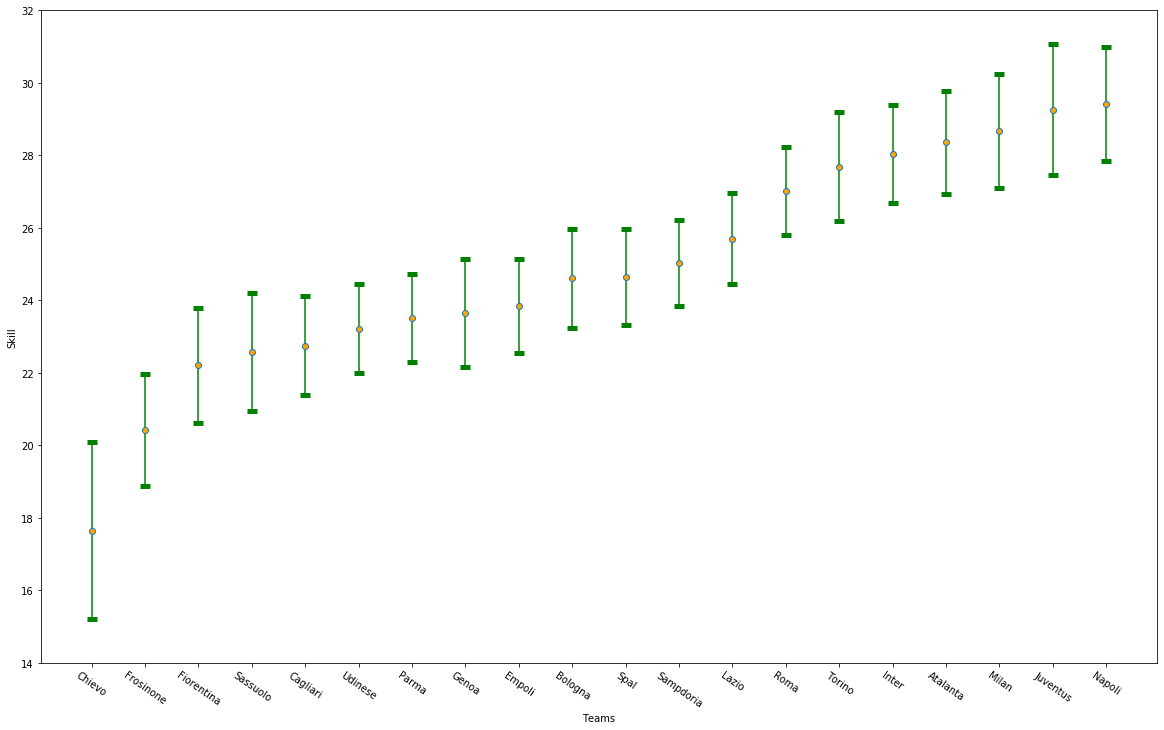

In [228]:
plt.rcParams["figure.figsize"] = (20,12)
#bp = plt.boxplot(results_pd['pdf_series'], labels=results_pd.index, showfliers=False)
eb = plt.errorbar(results_pd.index,
             results_pd['mean'],
             yerr=np.sqrt(results_pd['var']),
             fmt='o', 
             markerfacecolor='orange',
             ecolor='green',
             capsize=5, 
             capthick=5)

plt.xticks(rotation=-35)
plt.xlabel('Teams')
plt.ylabel('Skill')
plt.ylim((14,32))

#for i, line in enumerate(eb.lines):
#    print(line.get_xydata())
#    x, y = line.get_xydata()
#    offset_y = 6.3 if y < 27 else -6.3
#    text = f'μ={results_pd.iloc[i]["mean"]:.2f}\n σ={results_pd.iloc[i]["var"]:.2f}'
#    plt.annotate(text, xy=(x - 0.6, y + offset_y))
plt.show()

Here we can see the final results of the teams' skill levels, sorted in ascending order. We can interpret the variance as how sure we are of a teams' skill. If a teams' win/loss ratio is about 1:1 for a given mean skill level, we are fairly sure of that teams' skill level and the variance shrinks. 
<br>
<br>
If a team with low skill score wins against a team with high skill score, the former's mean and variance will increase and decrease respectively. This is because the team with low skill score is expected to perform better in future matches with higher confidence. Meanwhile, the latter's mean and variance both will decrease; the team with high skill score is expected to perform slightly worse in future matches with higher confidence, relative to their former mean. 

In [122]:
no_ties_df[(no_ties_df["team1"] == "Chievo")  | (no_ties_df["team2"] == "Chievo")]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
15,2018-08-26,20:30,Fiorentina,Chievo,6,1,1
45,2018-09-23,15:00,Chievo,Udinese,0,2,-1
54,2018-09-26,21:00,Genoa,Chievo,2,0,1
65,2018-09-30,15:00,Chievo,Torino,0,1,-1
74,2018-10-07,15:00,Milan,Chievo,3,1,1
84,2018-10-21,15:00,Chievo,Atalanta,1,5,-1
95,2018-10-28,15:00,Cagliari,Chievo,2,1,1
107,2018-11-04,15:00,Chievo,Sassuolo,0,2,-1
171,2018-12-26,15:00,Sampdoria,Chievo,2,0,1


In [204]:
no_ties_df[(no_ties_df["team1"] == "Chievo") & (no_ties_df['result'] == 1)  | (no_ties_df["team2"] == "Chievo") & (no_ties_df['result'] == -1)]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
187,2018-12-29,15:00,Chievo,Frosinone,1,0,1
322,2019-04-20,15:00,Lazio,Chievo,1,2,-1


In [215]:
no_ties_df[(no_ties_df["team1"] == "Sampdoria") & (no_ties_df['result'] == 1)  | (no_ties_df["team2"] == "Sampdoria") & (no_ties_df['result'] == -1)]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
24,2018-09-02,20:30,Sampdoria,Napoli,3,0,1
30,2018-09-15,20:30,Frosinone,Sampdoria,0,5,-1
68,2018-10-01,20:30,Sampdoria,Spal,2,1,1
76,2018-10-07,15:00,Atalanta,Sampdoria,0,1,-1
132,2018-12-01,20:30,Sampdoria,Bologna,4,1,1
153,2018-12-16,15:00,Sampdoria,Parma,2,0,1
166,2018-12-22,15:00,Empoli,Sampdoria,2,4,-1
171,2018-12-26,15:00,Sampdoria,Chievo,2,0,1
201,2019-01-26,18:00,Sampdoria,Udinese,4,0,1
243,2019-02-24,12:30,Sampdoria,Cagliari,1,0,1


In [214]:
no_ties_df[(no_ties_df["team1"] == "Sampdoria") & (no_ties_df['result'] == -1)  | (no_ties_df["team2"] == "Sampdoria") & (no_ties_df['result'] == 1)]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
11,2018-08-26,20:30,Udinese,Sampdoria,1,0,1
42,2018-09-22,20:30,Sampdoria,Inter,0,1,-1
96,2018-10-28,18:00,Milan,Sampdoria,3,2,1
105,2018-11-04,15:00,Sampdoria,Torino,1,4,-1
115,2018-11-11,15:00,Roma,Sampdoria,4,1,1
180,2018-12-29,12:30,Juventus,Sampdoria,2,1,1
211,2019-02-02,18:00,Napoli,Sampdoria,3,0,1
226,2019-02-10,15:00,Sampdoria,Frosinone,0,1,-1
237,2019-02-17,18:00,Inter,Sampdoria,2,1,1
263,2019-03-10,15:00,Sampdoria,Atalanta,1,2,-1


## Shuffle Data set and rerun

In [263]:
teams_dict = reset_teams_dict(no_ties_df)

In [264]:
shuffled_df = no_ties_df.sample(frac = 1) 
shuffled_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
54,2018-09-26,21:00,Genoa,Chievo,2,0,1
324,2019-04-20,15:00,Empoli,Spal,2,4,-1
75,2018-10-07,15:00,Lazio,Fiorentina,1,0,1
341,2019-05-04,18:00,Chievo,Spal,0,4,-1
357,2019-05-12,20:30,Roma,Juventus,2,0,1


In [248]:
teams_dict_updated = ADF(shuffled_df, teams_dict)
    

----------
Sassuolo: (25.00, 69.44 ), Empoli: (25.00, 69.44 )
expected_winner: Empoli, actual winner: Sassuolo
Sassuolo: (29.69, 49.06 ), Empoli: (20.56, 48.59 )
----------
----------
Udinese: (25.00, 69.44 ), Milan: (25.00, 69.44 )
expected_winner: Milan, actual winner: Milan
Udinese: (20.53, 50.76 ), Milan: (29.48, 50.45 )
----------
----------
Torino: (25.00, 69.44 ), Udinese: (20.53, 50.76 )
expected_winner: Torino, actual winner: Torino
Torino: (28.40, 49.87 ), Udinese: (17.76, 42.63 )
----------
----------
Sampdoria: (25.00, 69.44 ), Bologna: (25.00, 69.44 )
expected_winner: Bologna, actual winner: Sampdoria
Sampdoria: (29.16, 48.08 ), Bologna: (21.06, 49.04 )
----------
----------
Spal: (25.00, 69.44 ), Parma: (25.00, 69.44 )
expected_winner: Parma, actual winner: Spal
Spal: (28.73, 49.44 ), Parma: (20.58, 47.17 )
----------
----------
Fiorentina: (25.00, 69.44 ), Frosinone: (25.00, 69.44 )
expected_winner: Frosinone, actual winner: Frosinone
Fiorentina: (21.15, 52.01 ), Frosino

Parma: (26.54, 14.96 ), Fiorentina: (16.10, 28.83 )
----------
----------
Udinese: (15.37, 29.21 ), Chievo: (18.64, 15.60 )
expected_winner: Chievo, actual winner: Udinese
Udinese: (19.38, 18.73 ), Chievo: (16.74, 12.57 )
----------
----------
Genoa: (20.39, 22.69 ), Napoli: (29.63, 15.19 )
expected_winner: Napoli, actual winner: Napoli
Genoa: (19.95, 18.79 ), Napoli: (29.97, 13.44 )
----------
----------
Udinese: (19.38, 18.73 ), Sampdoria: (32.75, 14.73 )
expected_winner: Sampdoria, actual winner: Udinese
Udinese: (25.46, 12.26 ), Sampdoria: (28.06, 11.28 )
----------
----------
Lazio: (27.79, 23.82 ), Cagliari: (19.30, 32.67 )
expected_winner: Lazio, actual winner: Lazio
Lazio: (28.57, 19.40 ), Cagliari: (18.62, 25.53 )
----------
----------
Bologna: (21.95, 20.16 ), Juventus: (36.82, 22.45 )
expected_winner: Juventus, actual winner: Juventus
Bologna: (21.60, 18.99 ), Juventus: (37.02, 21.53 )
----------
----------
Empoli: (18.37, 10.71 ), Lazio: (28.57, 19.40 )
expected_winner: Laz

Napoli: (31.16, 6.67 ), Fiorentina: (13.66, 25.60 )
----------
----------
Udinese: (25.25, 11.57 ), Lazio: (25.10, 6.07 )
expected_winner: Udinese, actual winner: Lazio
Udinese: (23.44, 8.54 ), Lazio: (25.95, 5.36 )
----------
----------
Parma: (23.35, 6.15 ), Lazio: (25.95, 5.36 )
expected_winner: Lazio, actual winner: Lazio
Parma: (22.85, 5.69 ), Lazio: (26.67, 5.31 )
----------
----------
Napoli: (31.16, 6.67 ), Milan: (28.53, 9.58 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (31.81, 6.18 ), Milan: (27.57, 7.70 )
----------
----------
Atalanta: (26.53, 7.55 ), Fiorentina: (13.66, 25.60 )
expected_winner: Atalanta, actual winner: Atalanta
Atalanta: (26.62, 6.98 ), Fiorentina: (13.21, 24.96 )
----------
----------
Roma: (29.95, 12.21 ), Cagliari: (24.72, 10.93 )
expected_winner: Roma, actual winner: Roma
Roma: (30.80, 9.85 ), Cagliari: (24.01, 9.39 )
----------
----------
Sassuolo: (21.77, 12.15 ), Sampdoria: (26.46, 6.18 )
expected_winner: Sampdoria, actual winner: Sampdo

Lazio: (26.81, 3.57 ), Roma: (26.11, 3.95 )
----------
----------
Lazio: (26.81, 3.57 ), Inter: (29.50, 6.42 )
expected_winner: Inter, actual winner: Inter
Lazio: (26.45, 3.04 ), Inter: (30.12, 5.58 )
----------
----------
Sassuolo: (20.52, 7.27 ), Inter: (30.12, 5.58 )
expected_winner: Inter, actual winner: Sassuolo
Sassuolo: (23.27, 5.60 ), Inter: (27.99, 5.04 )
----------
----------
Genoa: (21.65, 7.52 ), Juventus: (31.96, 7.15 )
expected_winner: Juventus, actual winner: Genoa
Genoa: (24.51, 5.42 ), Juventus: (29.17, 5.60 )
----------
----------
Bologna: (27.01, 6.71 ), Udinese: (23.44, 4.09 )
expected_winner: Bologna, actual winner: Bologna
Bologna: (27.58, 6.42 ), Udinese: (23.14, 3.83 )
----------
----------
Atalanta: (25.51, 3.81 ), Udinese: (23.14, 3.83 )
expected_winner: Atalanta, actual winner: Atalanta
Atalanta: (25.81, 3.38 ), Udinese: (22.68, 3.34 )
----------
----------
Cagliari: (20.90, 5.56 ), Juventus: (29.17, 5.60 )
expected_winner: Juventus, actual winner: Juventus
C

Roma: (27.80, 2.52 ), Napoli: (30.23, 2.47 )
----------
----------
Juventus: (29.40, 3.83 ), Roma: (27.80, 2.52 )
expected_winner: Juventus, actual winner: Juventus
Juventus: (29.96, 3.78 ), Roma: (27.53, 2.14 )
----------
----------
Empoli: (22.51, 2.47 ), Fiorentina: (21.55, 6.30 )
expected_winner: Empoli, actual winner: Empoli
Empoli: (22.89, 2.38 ), Fiorentina: (20.78, 5.46 )
----------
----------
Frosinone: (22.69, 3.17 ), Napoli: (30.23, 2.47 )
expected_winner: Napoli, actual winner: Napoli
Frosinone: (22.74, 3.19 ), Napoli: (30.19, 2.22 )
----------
----------
Udinese: (22.32, 2.88 ), Bologna: (24.76, 3.31 )
expected_winner: Bologna, actual winner: Udinese
Udinese: (23.05, 2.59 ), Bologna: (23.92, 2.81 )
----------
----------
Chievo: (16.69, 4.37 ), Juventus: (29.96, 3.78 )
expected_winner: Juventus, actual winner: Juventus
Chievo: (16.73, 4.42 ), Juventus: (29.92, 3.60 )
----------
----------
Cagliari: (21.41, 3.60 ), Spal: (28.15, 2.90 )
expected_winner: Spal, actual winner: C

Spal: (25.03, 1.63 ), Fiorentina: (25.51, 3.08 )
----------
----------
Chievo: (16.70, 3.86 ), Napoli: (30.57, 1.83 )
expected_winner: Napoli, actual winner: Napoli
Chievo: (16.74, 3.74 ), Napoli: (30.64, 1.78 )
----------
----------
Napoli: (30.64, 1.78 ), Atalanta: (27.38, 1.78 )
expected_winner: Napoli, actual winner: Atalanta
Napoli: (30.17, 1.68 ), Atalanta: (27.99, 1.69 )
----------
----------
Inter: (27.19, 2.10 ), Bologna: (24.53, 1.91 )
expected_winner: Inter, actual winner: Bologna
Inter: (26.68, 1.89 ), Bologna: (25.05, 1.77 )
----------
----------
Torino: (28.29, 2.59 ), Juventus: (30.38, 3.02 )
expected_winner: Juventus, actual winner: Juventus
Torino: (27.96, 2.32 ), Juventus: (30.70, 2.61 )
----------
----------
Napoli: (30.17, 1.68 ), Bologna: (25.05, 1.77 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (30.26, 1.70 ), Bologna: (24.91, 1.74 )
----------
----------
Inter: (26.68, 1.89 ), Spal: (25.03, 1.63 )
expected_winner: Inter, actual winner: Inter
Inter: (2

In [249]:
results_pd = pd.DataFrame.from_dict(teams_dict_updated, orient='index', columns=["mean", "var"]).sort_values('mean')


In [250]:
results_pd

,mean,var
Chievo,16.751578,3.713702
Frosinone,21.861042,3.028332
Empoli,22.684847,1.733060
Parma,22.738036,2.106871
Cagliari,23.103561,1.582222
Genoa,23.657109,1.724096
Udinese,23.769157,1.402358
Bologna,24.169694,1.487825
Spal,24.523122,1.331293
Sassuolo,24.880354,2.815431


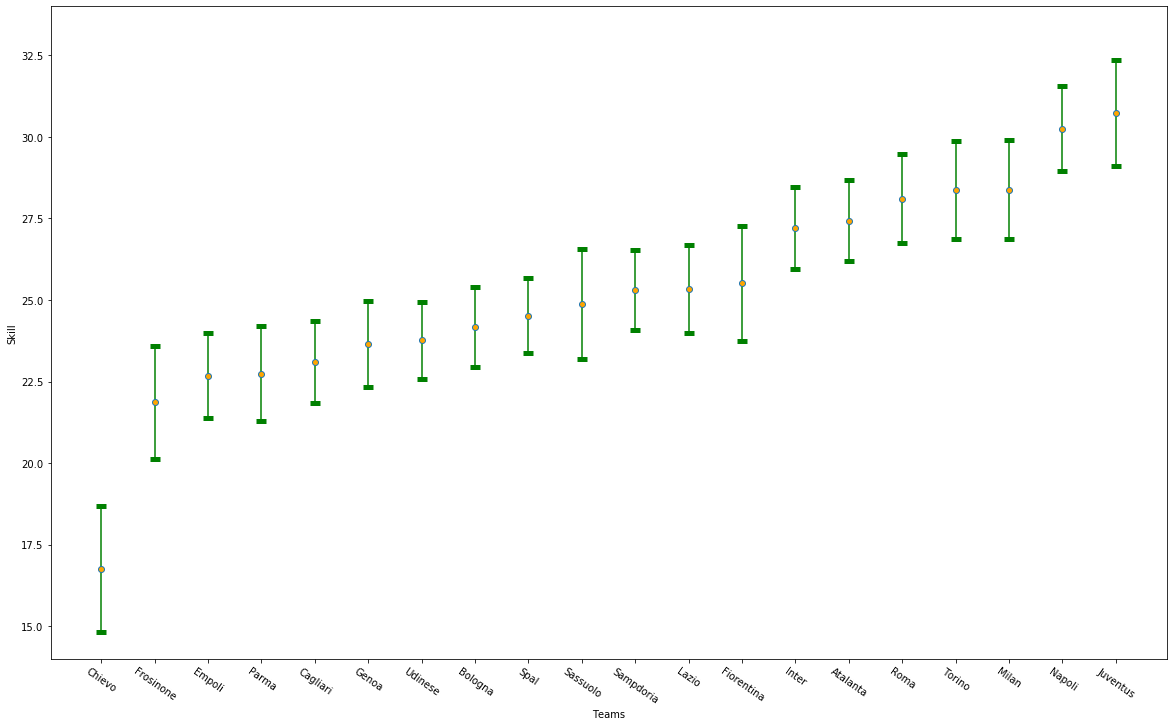

In [252]:
plt.rcParams["figure.figsize"] = (20,12)
eb = plt.errorbar(results_pd.index,
             results_pd['mean'],
             yerr=np.sqrt(results_pd['var']),
             fmt='o', 
             markerfacecolor='orange',
             ecolor='green',
             capsize=5, 
             capthick=5)

plt.xticks(rotation=-35)
plt.xlabel('Teams')
plt.ylabel('Skill')
plt.ylim((14,34))
plt.show()

The outcome varies depending on the order of the matches. Example: If Chievo wins against Lazio in the first match, this will have a much smaller effect on Chievo's estimated skill distribution (since it is very likely in the beginning that Chievo will win) compared to if Chievo wins against Lazio as the last game of the series, where the same outcome is very unlikely according to the posterior belief. 

# Q6

In [287]:
teams_dict = reset_teams_dict(no_ties_df)
teams_dict

{'Chievo': (25, 69.44444444444446),
 'Juventus': (25, 69.44444444444446),
 'Lazio': (25, 69.44444444444446),
 'Napoli': (25, 69.44444444444446),
 'Torino': (25, 69.44444444444446),
 'Roma': (25, 69.44444444444446),
 'Sassuolo': (25, 69.44444444444446),
 'Inter': (25, 69.44444444444446),
 'Empoli': (25, 69.44444444444446),
 'Cagliari': (25, 69.44444444444446),
 'Bologna': (25, 69.44444444444446),
 'Spal': (25, 69.44444444444446),
 'Atalanta': (25, 69.44444444444446),
 'Frosinone': (25, 69.44444444444446),
 'Milan': (25, 69.44444444444446),
 'Parma': (25, 69.44444444444446),
 'Udinese': (25, 69.44444444444446),
 'Sampdoria': (25, 69.44444444444446),
 'Genoa': (25, 69.44444444444446),
 'Fiorentina': (25, 69.44444444444446)}

In [288]:
predictions_df = no_ties_df
predictions_df["prediction"] = 0

C:\Users\maxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [289]:
predictions_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result,prediction
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1,0
1,2018-08-18,20:30,Lazio,Napoli,1,2,-1,0
2,2018-08-19,18:00,Torino,Roma,0,1,-1,0
3,2018-08-19,20:30,Sassuolo,Inter,1,0,1,0
5,2018-08-19,20:30,Empoli,Cagliari,2,0,1,0


In [290]:
def predict_y(s1, s2):
    if s1 > s2:
        return 1
    return -1

In [291]:
for i, row in predictions_df.iterrows():
    team_1 = row['team1']
    team_2 = row['team2']
    predictions_df.at[i, 'prediction'] = predict_y(teams_dict[team_1][0], teams_dict[team_2][0])

    new_mu, new_cov = gibbs_sample_one_game(teams_dict[team_1][0], 
                                            teams_dict[team_1][1],
                                            teams_dict[team_2][0], 
                                            teams_dict[team_2][1],
                                            row['result'], 
                                            1000)

    teams_dict[team_1] = (new_mu[0], new_cov[0, 0])
    teams_dict[team_2] = (new_mu[1], new_cov[1, 1])

In [292]:
correct_predictions = predictions_df[predictions_df['prediction'] == predictions_df['result']]

In [293]:
len(correct_predictions)/len(predictions_df)

0.6544117647058824